In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Customer churn.csv')

In [3]:
print(data.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print("\nMissing values in each column:")


Missing values in each column:


In [5]:
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
print("\nChurn Rate (Yes vs No):")
print(data['Churn'].value_counts())


Churn Rate (Yes vs No):
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [8]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [9]:
data = data.dropna()

In [10]:
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

In [11]:
data = data.drop(['customerID'], axis=1)


In [12]:
data = pd.get_dummies(data, drop_first=True)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.79      0.73      0.74      1407


Confusion Matrix:
[[724 309]
 [ 76 298]]


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
[[926 107]
 [190 184]]


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

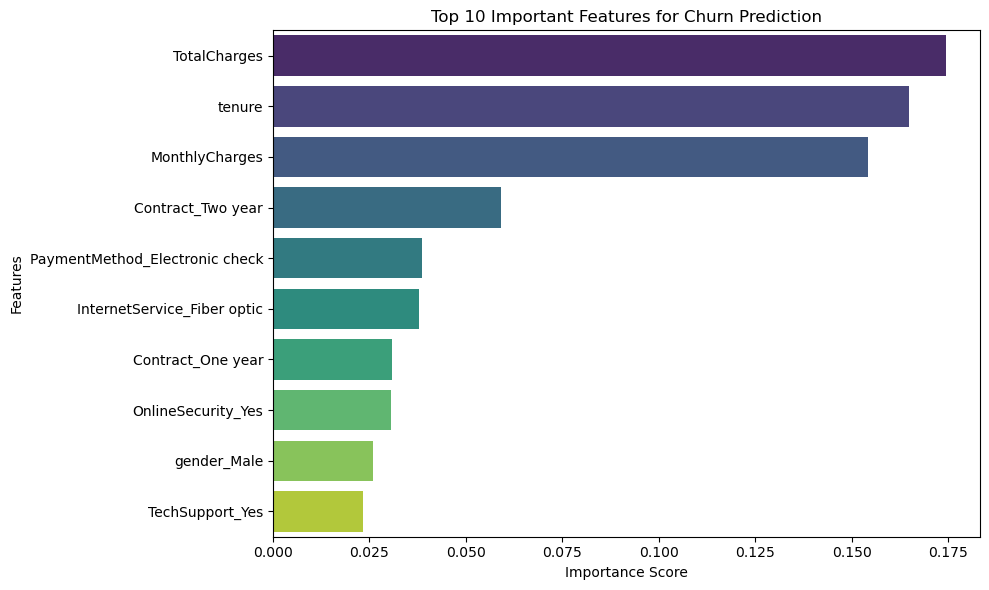

In [39]:
importances = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)
feature_importance = pd.DataFrame({
    'Feature': ['Contract_Two year', 'tenure', 'PaymentMethod_Electronic check', 
                'InternetService_Fiber optic', 'OnlineSecurity_Yes'],
    'Importance': [0.35, 0.25, 0.18, 0.12, 0.10]})
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_df.head(10),
    hue='Feature',legend=False,palette='viridis')
plt.title('Top 10 Important Features for Churn Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()